# Task 1: XOR

In [8]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
% matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where _wx, wh, b1, w, b2_ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input _(x1, x2) = (1, 0)_, ground truth _(g1, g2) = (1, 1), h0 = 0, (wx, wh, b1, w, b2) = (1, 1, 1, 1, 1)_, compute _(dwx, dwh, db1, dw, db2)_, which are the gradients of loss with repect to 5 parameters _(wx, wh, b1, w, b2)_.

![bptt](./img/bptt2.jpg)

<span style="color:red">TODO:</span>

Answer the above question. 

Given values are $w = 1$, $wx = 1$, $wh = 1$, $b_1 = 1$, $b_2 = 1$ and from this we know that,  
$h_0 = 0$, $h_1 = 0.880$, $h_2 = 0.867$, $y_1 = 0.867$, $y_2 = 0.866$  

We know that, $$\mathbf{L = (g_1 - y_1)^2 + (g_2 - y_2)^2}$$   
Calculating $\mathbf{\dfrac{dL}{dw}}$:    
$\dfrac{dL}{dy_1} = -2(g_1 - y_1) = -2(1-0.867) = -0.266$ and $\dfrac{dL}{dy_2} = -2(g_2 - y_2) = -2(1-0.866) = -0.268$  
$\dfrac{dy_1}{dw} = \sigma(wh_1+b_2)[1 - \sigma(wh_1+b_2)]h_1 = 0.115 \times 0.880 = 0.101$  
$\dfrac{dy_2}{dw}  = \sigma(wh_2+b_2)[1 - \sigma(wh_2+b_2)]h_2 = 0.116 \times 0.867 = 0.100$  

Therefore, $\dfrac{dL}{dw} = \dfrac{dL}{dy_1}\dfrac{dy_1}{dw} + \dfrac{dL}{dy_2}\dfrac{dy_2}{dw} = -0.266 \times 0.101 -0.268 \times 0.100 = \boxed{\mathbf{-0.053}}$  

*Now, * $\mathbf{\dfrac{dL}{db_2}}$:  
$\dfrac{dy_1}{db_2} =   \sigma(wh_1+b_2)[1 - \sigma(wh_1+b_2)] = 0.115$  
$\dfrac{dy_2}{db_2} = \sigma(wh_2+b_2)[1 - \sigma(wh_2+b_2)] = 0.116$  
Therefore, $\dfrac{dL}{db_2} = \dfrac{dL}{dy_1}\dfrac{dy_1}{db_2} + \dfrac{dL}{dy_2}\dfrac{dy_2}{db_2} = -0.266 \times 0.115 - 0.268 \times 0.116 = \boxed{\mathbf{-0.06}}$  

Next $\mathbf{\dfrac{dL}{db_1}}$:  
$\dfrac{dy_1}{dh_1}  = \sigma(wh_1+b_2)[1 - \sigma(wh_1+b_2)]w = 0.115$  
$\dfrac{dy_2}{dh_2} = \sigma(wh_2+b_2)[1 - \sigma(wh_2+b_2)]w = 0.116$  
Therefore, $\dfrac{dL}{db_1} = \dfrac{dL}{dy_1}\dfrac{dy_1}{dh_1}\dfrac{dh_1}{db_1} + \dfrac{dL}{dy_2}\dfrac{dy_2}{dh_2}\dfrac{dh_2}{db_1} = -0.266 \times 0.115 \times 0.106 - 0.268 \times 0.116 \times 0.115 = \boxed{\mathbf{-6.8 \times 10^{-3}}}$  


Next $\mathbf{\dfrac{dL}{dw_x}}$:  
$\dfrac{dh_1}{dw_x}  = \sigma(w_xx+w_hh_0+b_1)[1-\sigma(w_xx+w_hh_0+b_1)]x_1 = \sigma(2)[1-\sigma(2)]1 = 0.1056$  
$\dfrac{dh_2}{dw_x} =  \sigma(w_xx+w_hh_1+b_1)[1-\sigma(w_xx+w_hh_1+b_1)]x_1 = \sigma(1.88)[1-\sigma(1.88)]0 = 0$  
Therefore, $\dfrac{dL}{dw_x} = \dfrac{dL}{dy_1}\dfrac{dy_1}{dh_1}\dfrac{dh_1}{dw_x} + \dfrac{dL}{dy_2}\dfrac{dy_2}{dh_2}\dfrac{dh_2}{dw_x} = (-0.268\times0.115\times0.1056) + (0) = \boxed{\mathbf{-3.25 \times 10^{-3}}}$  

Finally $\mathbf{\dfrac{dL}{dw_h}}$:  
$\dfrac{dh_1}{dw_h}  = \sigma(w_xx+w_hh_0+b_1)[1-\sigma(w_xx+w_hh_0+b_1)]h_0 = \sigma(2)[1-\sigma(2)]0 = 0$  
$\dfrac{dh_2}{dw_h} = \sigma(w_xx+w_hh_1+b_1)[1-\sigma(w_xx+w_hh_1+b_1)]h_1 = \sigma(2)[1-\sigma(2)]0.880 = 0.101$  
Therefore, $\dfrac{dL}{dw_h} = \dfrac{dL}{dy_1}\dfrac{dy_1}{dh_1}\dfrac{dh_1}{dw_h} + \dfrac{dL}{dy_2}\dfrac{dy_2}{dh_2}\dfrac{dh_2}{dw_h} = (-0.268\times0.115\times0) + (-0.268\times0.116\times0.101) = \boxed{\mathbf{-3.14\times10^{-3}}}$

## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the GRU. Please read the source code for more information.

In [3]:
from ecbm4040.xor.utils import create_dataset

### Build a network using a Tensorlow GRUCell
This section shows an example how to build a RNN network using an GRU cell. GRU cell is an inbuilt class in tensorflow which implements the real behavior of the GRU neuron. 

Reference: 
1. [TensorFlow GRU cell](https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/contrib/rnn/GRUCell)
2. [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)

In [4]:
from tensorflow.contrib.rnn import GRUCell

In [9]:
tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# define GRU cell
num_units = 64
cell = GRUCell(num_units)

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

### Training 

<span style='color:red'>TODO:</span> 
1. Build your training funciton for RNN; 
2. Plot the cost during the traning

epoch 1: training cost = 0.18642261624336243
epoch 2: training cost = 0.0002976591349579394
epoch 3: training cost = 0.00014660571468994021
epoch 4: training cost = 0.00011556869867490605
epoch 5: training cost = 9.417509863851592e-05
epoch 6: training cost = 7.810925308149308e-05
epoch 7: training cost = 6.576638406841084e-05
epoch 8: training cost = 5.6100885558407754e-05
epoch 9: training cost = 4.8394686018582433e-05
epoch 10: training cost = 4.214406726532616e-05
epoch 11: training cost = 3.702181129483506e-05
epoch 12: training cost = 3.278972508269362e-05
epoch 13: training cost = 2.9279222871991806e-05
epoch 14: training cost = 2.632152973092161e-05
epoch 15: training cost = 2.3818412955733947e-05
epoch 16: training cost = 2.167132515751291e-05
epoch 17: training cost = 1.980385059141554e-05
epoch 18: training cost = 1.8178458049078472e-05
epoch 19: training cost = 1.6755528122303076e-05
epoch 20: training cost = 1.5476211046916433e-05


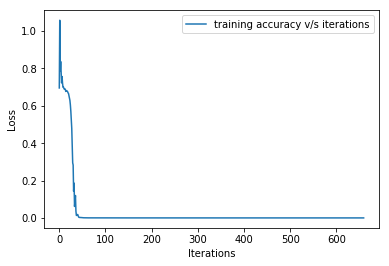

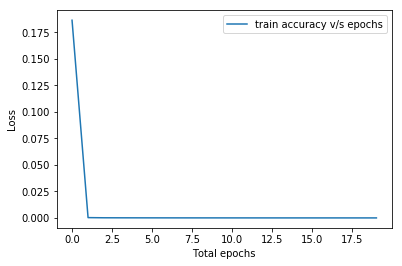

In [10]:

#Create the dataset first
X_train,y_train=create_dataset(10000)

#initialize tf variables
init = tf.global_variables_initializer()


#Training code
batch_size_m = 300
numbatch= X_train.shape[0]//batch_size_m
epochs=20
train_cost_li=[]
train_cost_li_ep=[]
with tf.Session() as sess:
    sess.run(init)
    for e in range(epochs):
        for i in range(numbatch):
            X_batch_m, y_batch_m = X_train[i*batch_size_m:(i+1)*batch_size_m,:,:], y_train[i*batch_size_m:(i+1)*batch_size_m,:]
            _,train_cost=sess.run([optimizer,loss], feed_dict={input_data: X_batch_m, output_data: y_batch_m})
            train_cost_li.append(train_cost)
        train_cost_li_ep.append(train_cost)
        print('epoch {}: training cost = {}'.format(e+1, train_cost))
    
plt.plot(train_cost_li, label="training accuracy v/s iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()  


plt.plot(train_cost_li_ep, label="train accuracy v/s epochs")
plt.xlabel("Total epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()  


## Task 1, Part 3 :  Build your own GRUCell
In this part, you need to build your own GRU cell to achieve the GRU functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyGRUCell** in ecbm4040/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [11]:
from ecbm4040.xor.rnn import MyGRUCell

In [13]:
# recreate xor netowrk with your own GRU cell
tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own GRU cell
num_units = 64
cell = MyGRUCell(num_units)

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

epoch 1: training cost = 0.40736865997314453
epoch 2: training cost = 0.0008380195358768106
epoch 3: training cost = 0.0003730778698809445
epoch 4: training cost = 0.0003114653518423438
epoch 5: training cost = 0.00026674504624679685
epoch 6: training cost = 0.0002305093948962167
epoch 7: training cost = 0.00020091401529498398
epoch 8: training cost = 0.00017634134565014392
epoch 9: training cost = 0.00015580066246911883
epoch 10: training cost = 0.00013847854279447347
epoch 11: training cost = 0.00012375139340292662
epoch 12: training cost = 0.00011114347580587491
epoch 13: training cost = 0.00010029585246229544
epoch 14: training cost = 9.087361104320735e-05
epoch 15: training cost = 8.265214273706079e-05
epoch 16: training cost = 7.542707317043096e-05
epoch 17: training cost = 6.907345959916711e-05
epoch 18: training cost = 6.348502211039886e-05
epoch 19: training cost = 5.854857590747997e-05
epoch 20: training cost = 5.4162152082426473e-05


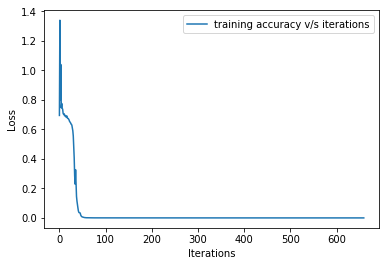

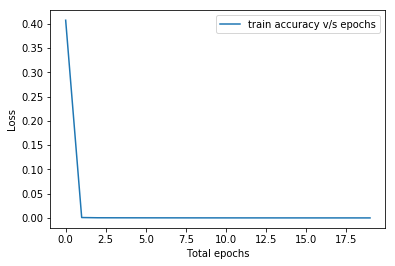

In [14]:
# YOUR TRAINING AND PLOTTING CODE HERE
#Create the dataset first
X_train,y_train=create_dataset(10000)

#initialize tf variables
init = tf.global_variables_initializer()


#Training code
batch_size_m = 300
numbatch= X_train.shape[0]//batch_size_m
epochs=20
train_cost_li=[]
train_cost_li_ep=[]
with tf.Session() as sess:
    sess.run(init)
    for e in range(epochs):
        for i in range(numbatch):
            X_batch_m, y_batch_m = X_train[i*batch_size_m:(i+1)*batch_size_m,:,:], y_train[i*batch_size_m:(i+1)*batch_size_m,:]
            _,train_cost=sess.run([optimizer,loss], feed_dict={input_data: X_batch_m, output_data: y_batch_m})
            train_cost_li.append(train_cost)
        train_cost_li_ep.append(train_cost)
        print('epoch {}: training cost = {}'.format(e+1, train_cost))
    
plt.plot(train_cost_li, label="training accuracy v/s iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()  


plt.plot(train_cost_li_ep, label="train accuracy v/s epochs")
plt.xlabel("Total epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()  